# SLR FINAL EXAM

### DATA DESCRIPTION: 

The New York City Department of Transportation collects daily data about the number of bicycles going over bridges in New York City. This data is used to measure bike utilization as a part of transportation planning. This dataset is a daily record of the number of bicycles crossing into or out of Manhattan via one of the East River bridges (that is, excluding Bronx thruways and the non-bikeable Hudson River tunnels) for a stretch of 9 months.

### ATTRIBUTES:


•	High Temp (°F)

•	Low Temp (°F)

•	Precipitation

•	Brooklyn Bridge

•	Manhattan Bridge

•	Williamsburg Bridge

•	Queensboro Bridge

•	Total




### 1.	 Read the dataset (tab, csv, xls, txt, inbuilt dataset) 

In [1]:
## Kindly change the below cells from markdown to code and execute it 

In [2]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)

df=pd.read_csv("data_set.csv")

df.head()


,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,78.1,66.0,0.01,1704.0,3126.0,4115.0,2552.0,11497.0
1,55.0,48.9,0.15,827.0,1646.0,2565.0,1884.0,6922.0
2,39.9,34.0,0.09,526.0,1232.0,1695.0,1306.0,4759.0
3,44.1,33.1,0.47 (S),521.0,1067.0,1440.0,1307.0,4335.0
4,42.1,26.1,0,1416.0,2617.0,3081.0,2357.0,9471.0


### 2.	Summarize important observations from the data set (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	What are the number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [3]:
#a
print(df.shape)
df.info() # 1 categorical rest all are numeric

#b
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
for i in df.select_dtypes(include=np.number).columns:
    plt.tight_layout()
    sns.boxplot(df[i])
    plt.show()
    
    
#None of the numeric columns have outliers

#c
#There are no categorical columns

        

(1374, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 8 columns):
High Temp (°F)         1373 non-null float64
Low Temp (°F)          1373 non-null float64
Precipitation          1373 non-null object
Brooklyn Bridge        1373 non-null float64
Manhattan Bridge       1373 non-null float64
Williamsburg Bridge    1373 non-null float64
Queensboro Bridge      1373 non-null float64
Total                  1373 non-null float64
dtypes: float64(7), object(1)
memory usage: 86.0+ KB


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [4]:
def prec(i):
    try:
        return float(i)
    except:
        try:
            return (i.split()[0])
        except:
            return None
        
df["Precipitation"]=df["Precipitation"].apply(prec)

In [5]:
def prec2(i):
    if i=="T":
        return 0.2
    else:
        return i

In [6]:
df["Precipitation"]=df["Precipitation"].apply(prec2)

### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the data normally distributed? Is it a defect? Why or why not? 


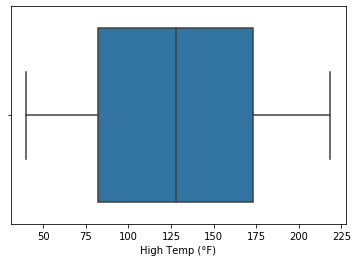

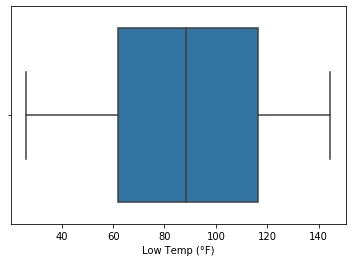

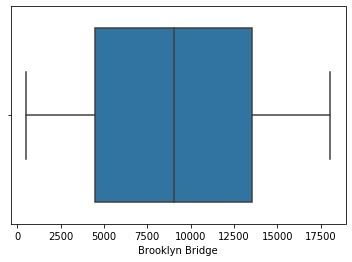

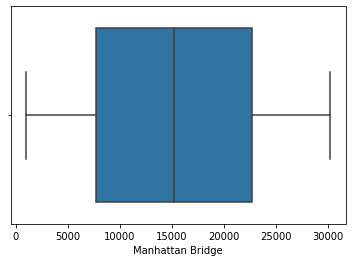

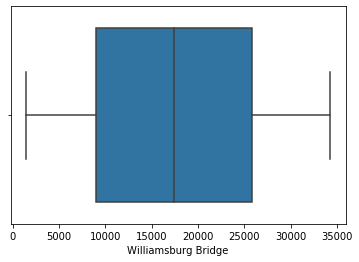

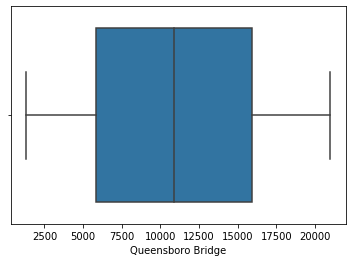

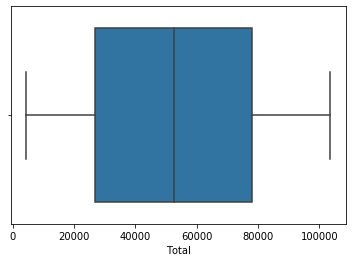

0.07959567573489057
0.05101165359213205
0.08309295384322438
0.08200893406890959
0.08445220173383404
0.08433687170917986
0.08373482901972812


In [7]:
#a
df=df.ffill().bfill()

#b
for i in df.select_dtypes(include=np.number).columns:
    plt.tight_layout()
    sns.boxplot(df[i])
    plt.show()
#No outliers observed


#c
for i in df.drop("Precipitation",axis=1).columns:
    print(df[i].skew())
#As seen the numeric variables are roughly normally distributed
#Its not a defect


In [8]:
df["Precipitation"]=df["Precipitation"].astype(float)
df.corr()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
High Temp (°F),1.000000,0.997689,0.148530,0.998230,0.998050,0.998401,0.998153,0.998251
Low Temp (°F),0.997689,1.000000,0.148995,0.994287,0.994213,0.994921,0.994385,0.994527
Precipitation,0.148530,0.148995,1.000000,0.147326,0.147155,0.147462,0.147270,0.147314
Brooklyn Bridge,0.998230,0.994287,0.147326,1.000000,0.999892,0.999888,0.999866,0.999938
Manhattan Bridge,0.998050,0.994213,0.147155,0.999892,1.000000,0.999930,0.999909,0.999973
Williamsburg Bridge,0.998401,0.994921,0.147462,0.999888,0.999930,1.000000,0.999936,0.999980
Queensboro Bridge,0.998153,0.994385,0.147270,0.999866,0.999909,0.999936,1.000000,0.999961
Total,0.998251,0.994527,0.147314,0.999938,0.999973,0.999980,0.999961,1.000000


In [9]:
df["Avg daily temp"]=(df[["High Temp (°F)","Low Temp (°F)"]].sum(axis=1))/2
df["Avg daily bikers"]=df[['Brooklyn Bridge','Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge']].sum(axis=1)/4

In [10]:
df.corr()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Avg daily temp,Avg daily bikers
High Temp (°F),1.000000,0.997689,0.148530,0.998230,0.998050,0.998401,0.998153,0.998251,0.999660,0.998251
Low Temp (°F),0.997689,1.000000,0.148995,0.994287,0.994213,0.994921,0.994385,0.994527,0.999122,0.994527
Precipitation,0.148530,0.148995,1.000000,0.147326,0.147155,0.147462,0.147270,0.147314,0.148790,0.147314
Brooklyn Bridge,0.998230,0.994287,0.147326,1.000000,0.999892,0.999888,0.999866,0.999938,0.997262,0.999938
Manhattan Bridge,0.998050,0.994213,0.147155,0.999892,1.000000,0.999930,0.999909,0.999973,0.997123,0.999973
Williamsburg Bridge,0.998401,0.994921,0.147462,0.999888,0.999930,1.000000,0.999936,0.999980,0.997611,0.999980
Queensboro Bridge,0.998153,0.994385,0.147270,0.999866,0.999909,0.999936,1.000000,0.999961,0.997252,0.999961
Total,0.998251,0.994527,0.147314,0.999938,0.999973,0.999980,0.999961,1.000000,0.997368,1.000000
Avg daily temp,0.999660,0.999122,0.148790,0.997262,0.997123,0.997611,0.997252,0.997368,1.000000,0.997368
Avg daily bikers,0.998251,0.994527,0.147314,0.999938,0.999973,0.999980,0.999961,1.000000,0.997368,1.000000


### 4.	Summarize relationships among variables (10 marks)  

a.	Plot correlation plots. Which are the variables most correlated with Target? Which independent variables are correlated among themselves? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

b.	Plot all independent variables with the target. Are all relationships linear? If not, what steps would you take based on this information?

 Hint: based on your observations you may want to transform features or create additional features.


Index(['High Temp (°F)', 'Low Temp (°F)', 'Precipitation', 'Brooklyn Bridge',
       'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge', 'Total',
       'Avg daily temp', 'Avg daily bikers'],
      dtype='object')

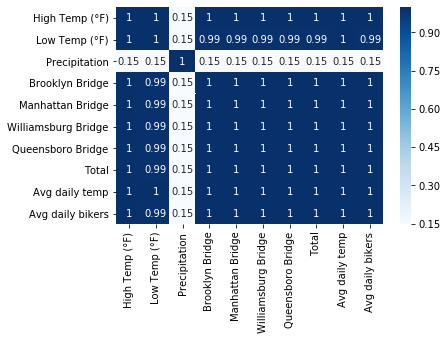

In [11]:
#a
sns.heatmap(df.corr(),annot=True,cmap="Blues")
# All the 4 bridges are most correlated with target
#All 4 bridges have high correlation among each of them
#Actually, all 4 bridges combine to form the total, so well sum them up
df.columns
#df["sum"]=df[['Brooklyn Bridge','Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge']].sum(axis=1)
#df.drop(['Brooklyn Bridge','Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge'],axis=1,inplace=True)


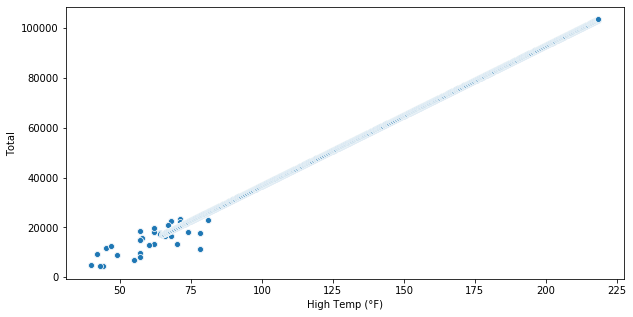

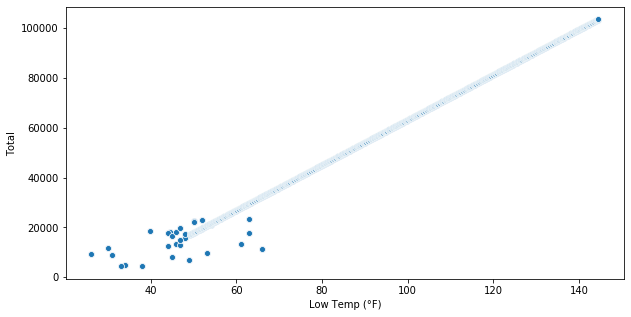

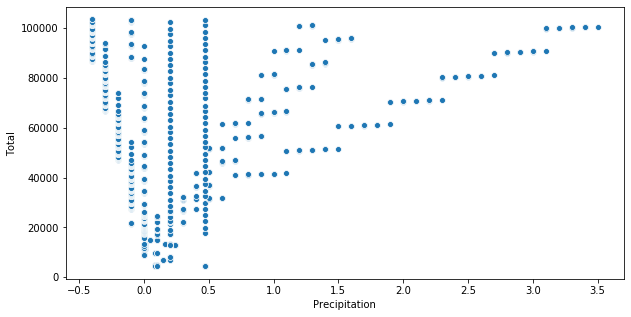

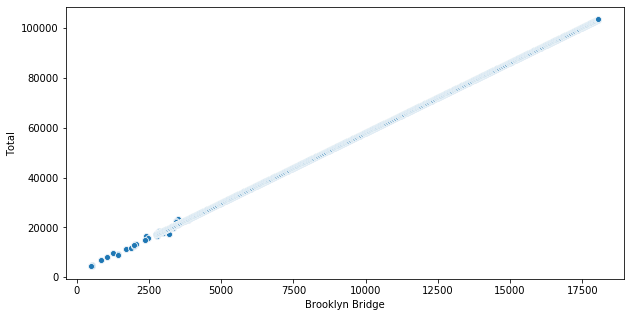

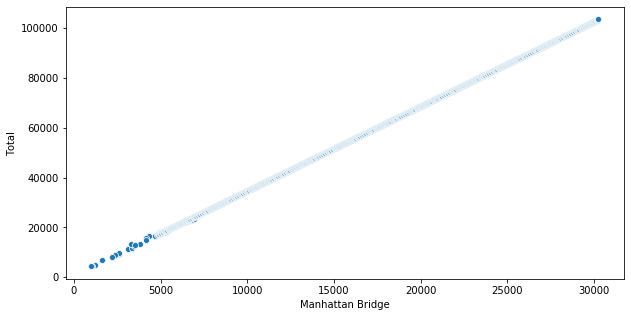

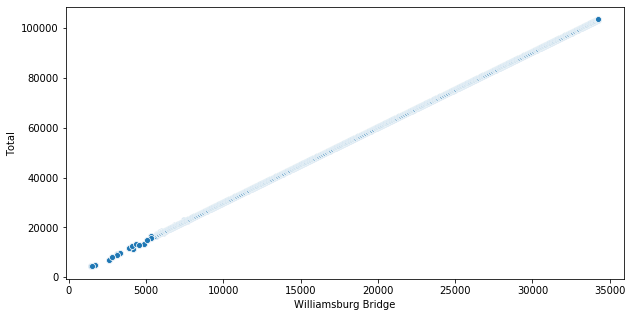

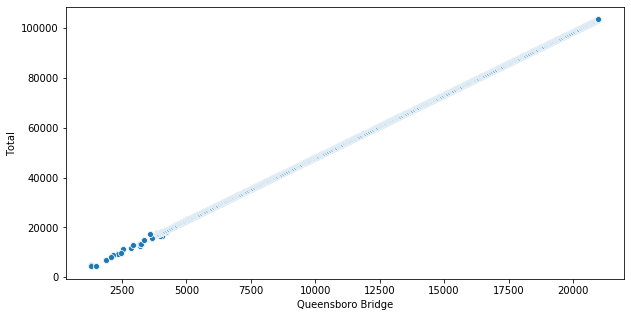

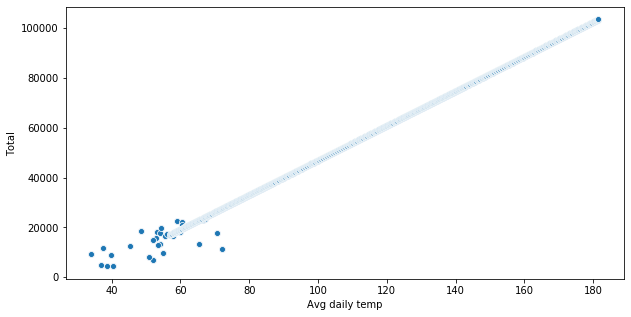

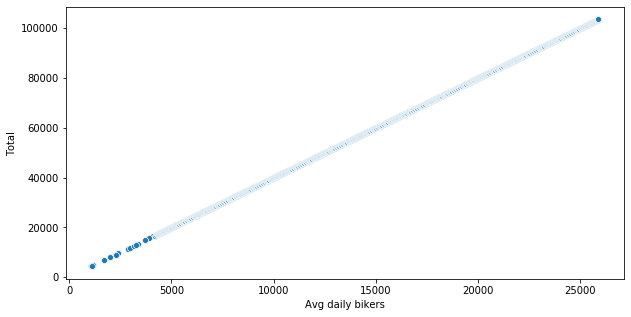

In [12]:
plt.rcParams["figure.figsize"]=[10,5]
for i in df.drop("Total",axis=1).columns:
    plt.tight_layout()
    sns.scatterplot(df[i],df["Total"])
    plt.show()
    
#All relationship except precipitation are linear

In [13]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#df_scaled=scaler.fit_transform(df)
#pd.DataFrame(df_scaled,columns=df.columns)

### 5.	Split dataset into train and test (70:30) (5 marks)

a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [14]:
df.columns
df=df[['Avg daily temp', 'Avg daily bikers','Precipitation','Total']]

In [15]:
df.head()

,Avg daily temp,Avg daily bikers,Precipitation,Total
0,72.05,2874.25,0.01,11497.0
1,51.95,1730.50,0.15,6922.0
2,36.95,1189.75,0.09,4759.0
3,38.60,1083.75,0.47,4335.0
4,34.10,2367.75,0.00,9471.0


In [16]:
X=df.drop("Total",axis=1)
y=df["Total"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25)

In [17]:
from scipy import stats
#H0: Mean of both samples is same  . Both come from same distribution
#H1: Both sampes have different mean  Both follow different distribution
stats.ttest_ind(ytrain,ytest)
#Since pvalue is greater than 0.05 thus we fail to reject the null hypothesis and safely conclude that
#both samples come from same distribution

Ttest_indResult(statistic=2.1901688168086757, pvalue=0.028679837257687597)

### 6.	Fit a base model. Please write your key observations (15 marks) 

a.	What is the overall R2? Please comment on whether it is good or not.

b.	What is the adjusted R2? Is it different from R2? Why?

c.	Which variables are significant?

d.	Is there multicollinearity?

e.	Which other key model output parameters do you want to look at? 


In [18]:
from sklearn.metrics import r2_score

In [19]:
df.head()

,Avg daily temp,Avg daily bikers,Precipitation,Total
0,72.05,2874.25,0.01,11497.0
1,51.95,1730.50,0.15,6922.0
2,36.95,1189.75,0.09,4759.0
3,38.60,1083.75,0.47,4335.0
4,34.10,2367.75,0.00,9471.0


In [20]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
model=lin.fit(xtrain,ytrain)
pred=model.predict(xtest)
r2=r2_score(ytest,pred)
adj_r2=1-(((1-r2)*(len(xtest)-1))/(len(xtest)-3-1))
print(r2,adj_r2)
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,pred)

0.9999999995591123 0.9999999995552221


0.3346437191119429

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 4 columns):
Avg daily temp      1374 non-null float64
Avg daily bikers    1374 non-null float64
Precipitation       1374 non-null float64
Total               1374 non-null float64
dtypes: float64(4)
memory usage: 43.0 KB


In [22]:
#ytrain=ytrain.reset_index()["Total"]

In [23]:
#import statsmodels.api as sm
#xtrain_c=sm.add_constant(xtrain)
#xtest_c=sm.add_constant(xtest)
#model=sm.OLS(ytrain,xtrain_c).fit()
#model.summary()
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,pred)

0.3346437191119429

df.drop("Total",axis=1).corr()
df["Temp diff"]=df[["High Temp (°F)","Low Temp (°F)"]].diff(axis=1)[["Low Temp (°F)"]]
df.head()
df.drop(["High Temp (°F)","Low Temp (°F)"],axis=1,inplace=True)

In [25]:
df.head()
X=df.drop("Total",axis=1)
y=df["Total"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25)
lin=LinearRegression()
model=lin.fit(xtrain,ytrain)
pred=model.predict(xtest)
r2=r2_score(ytest,pred)
adj_r2=1-(((1-r2)*(len(xtest)-1))/(len(xtest)-2-1))
print(r2,adj_r2)
print(mean_squared_error(ytest,pred))

0.9999999995652447 0.9999999995626948
0.3521272902493445


### 7.	How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (20 marks)
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


In [26]:

from sklearn.linear_model import LinearRegression
lin=LinearRegression()
model=lin.fit(xtrain,ytrain)
pred=model.predict(xtest)
r2=r2_score(ytest,pred)
adj_r2=1-(((1-r2)*(len(xtest)-1))/(len(xtest)-3-1))
print(r2,adj_r2)
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,pred)

0.9999999995652447 0.9999999995614086


0.3521272902493445

In [32]:
from sklearn.linear_model import Ridge,Lasso
ridg=Ridge()
model=ridg.fit(xtrain,ytrain)
pred=model.predict(xtest)
r2=r2_score(ytest,pred)
adj_r2=1-(((1-r2)*(len(xtest)-1))/(len(xtest)-3-1))
print(r2,adj_r2)
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,pred)


0.9999999995652468 0.9999999995614107


0.35212556871492534

In [33]:
las=Lasso()
model=ridg.fit(xtrain,ytrain)
pred=model.predict(xtest)
r2=r2_score(ytest,pred)
adj_r2=1-(((1-r2)*(len(xtest)-1))/(len(xtest)-3-1))
print(r2,adj_r2)
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,pred)


0.9999999995652468 0.9999999995614107


0.35212556871492534

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(las,X,y,cv=3)
#As we can see the cross validation score for K=3 folds is almost similar across all 3 folds

array([0.80042945, 1.        , 1.        ])

In [35]:
# Multiple things can be done to improve model accuracy

#  Dealing with multicollinearity, scaling data and transforming it

# Using regularisation to deal with high variance. 

#Applied ridge and lasso regression 
# but both didnt lead to significant effect on model performance

#Use cross validation with K folds led us to confirm the accuracy and performance of our model

#Thus from mean squared error of thousands we were able to get down to an error of 0.35
# by using various techniques mentioned above for improvig model performance

#We also confirmed model validation with cross validation and thus we can be sure of our model performance

### 8.	Summarize as follows (10 marks) 

1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model
2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.
3.	What changes from the base model had the most affect on model performance
4.	What are the key risks to your results and interpretation


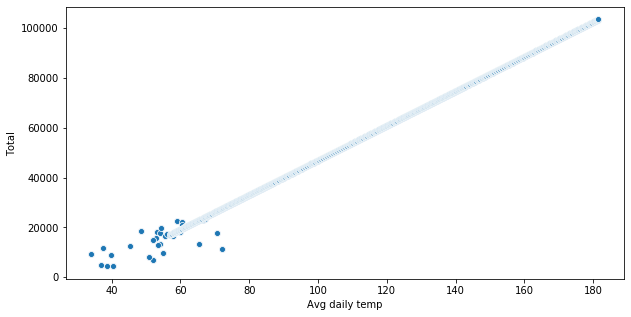

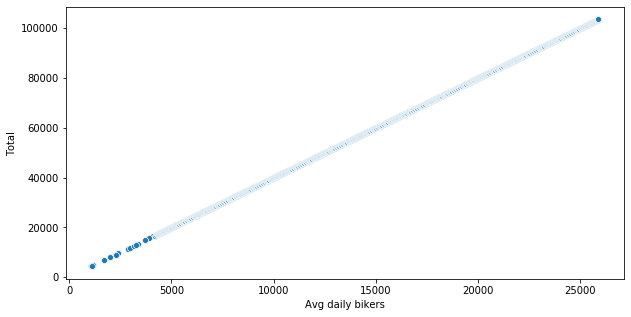

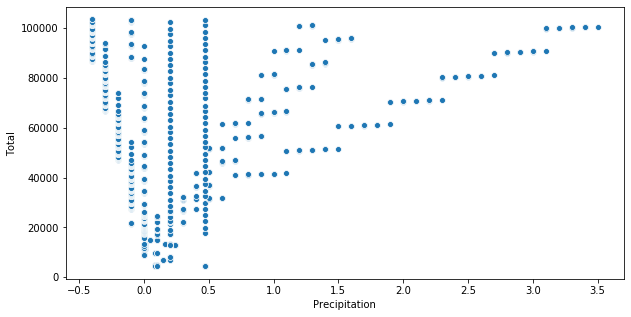

In [30]:
for i in df.drop("Total",axis=1):
    plt.tight_layout()
    sns.scatterplot(df[i],df["Total"])
    plt.show()
    
# This shows average daily temperature and number of bikers commuting daily on average basis significantly affect 
#the target variable "Total"